In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [85]:
model_performance = []
model_name = []

In [5]:
column_names = ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation',\
                'relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']

In [6]:
filename = '../adult.data'
df_adult_train = pd.read_csv(filename,header=None,names=column_names)


In [7]:
df_adult_train.shape

(32561, 15)

In [8]:
df_adult_train.head()

age          workclass  fnlwgt   education  educational-num  \
0   39          State-gov   77516   Bachelors               13   
1   50   Self-emp-not-inc   83311   Bachelors               13   
2   38            Private  215646     HS-grad                9   
3   53            Private  234721        11th                7   
4   28            Private  338409   Bachelors               13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [9]:
df_adult_train.shape

(32561, 15)

In [10]:
df_adult_train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df_adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df_adult_train.describe()

age        fnlwgt  educational-num  capital-gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [13]:
df_adult_train_orig = df_adult_train

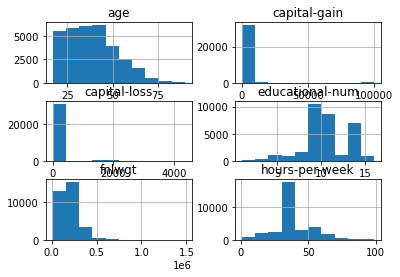

In [14]:

df_adult_train.hist()
plt.show()

In [15]:
cat_cols = list(df_adult_train.select_dtypes(exclude=["int64", "float"]))
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [16]:
num_cols = list(df_adult_train.select_dtypes(exclude=["object"]))
num_cols


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

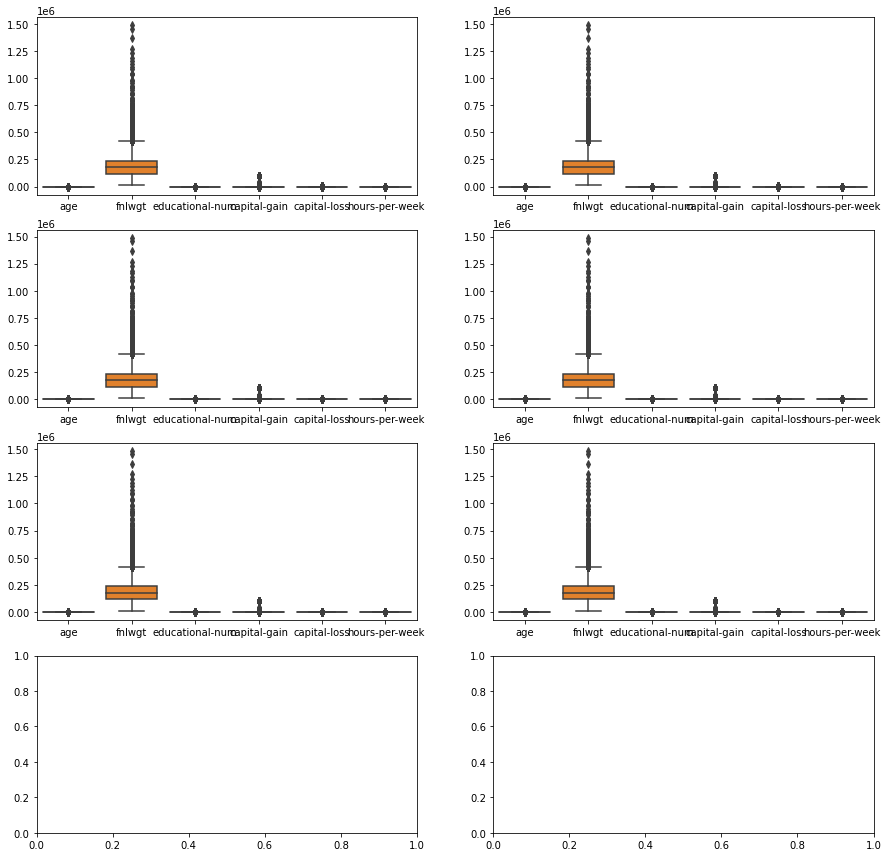

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
i = j = 0
for col in num_cols:
    g = sns.boxplot(data=df_adult_train, ax=axs[i][j])
    j += 1
    if j>1:
        i += 1; j = 0

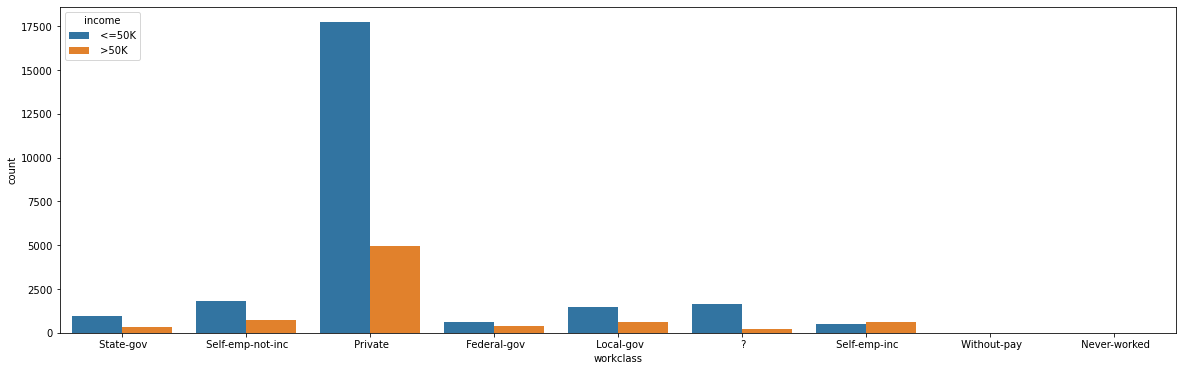

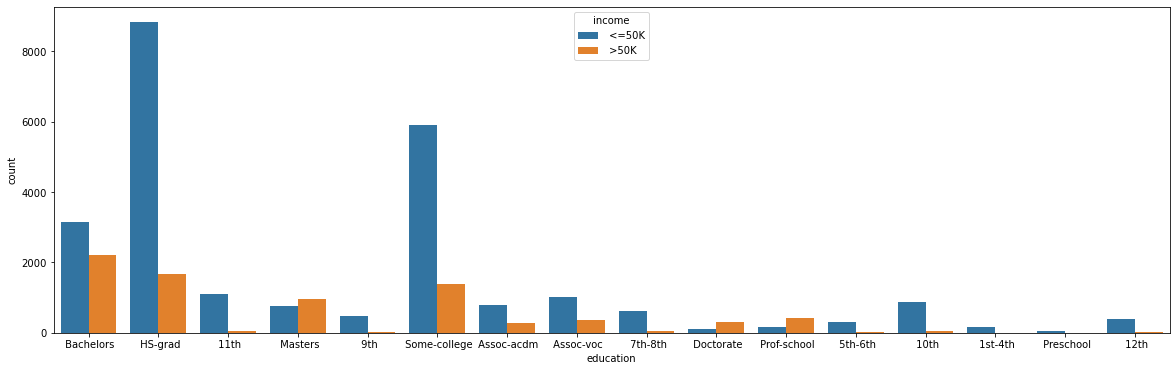

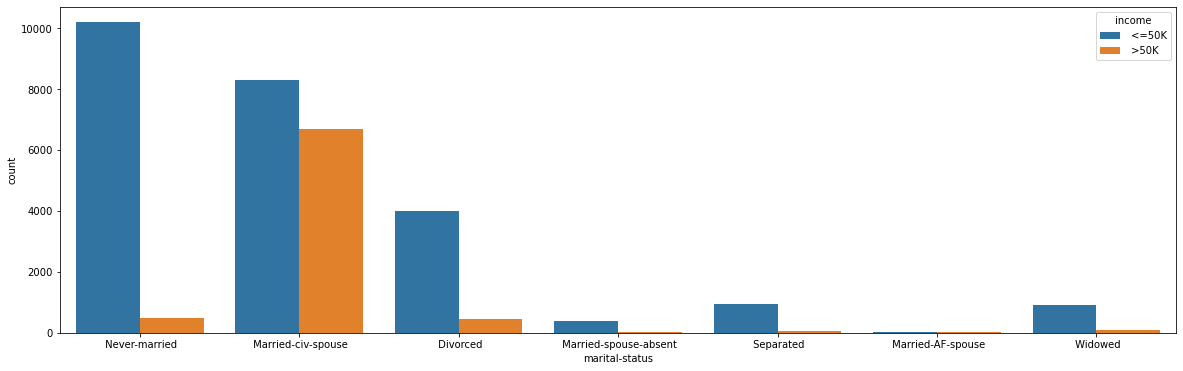

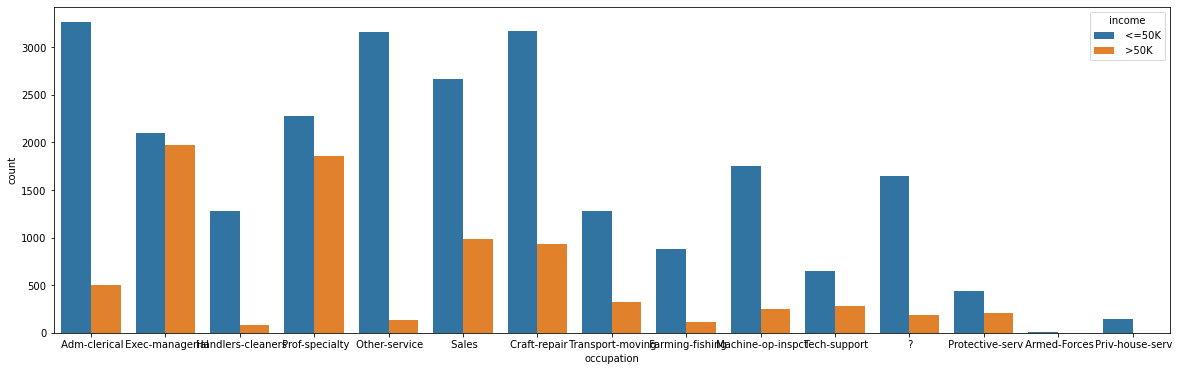

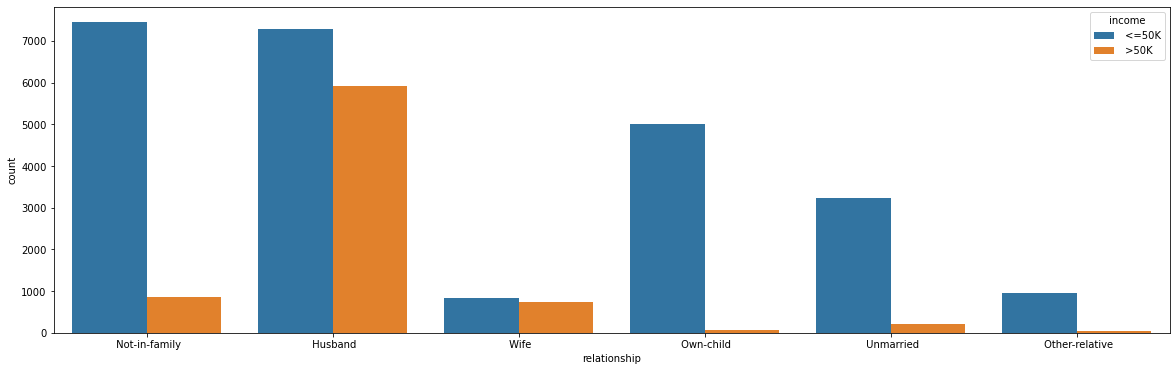

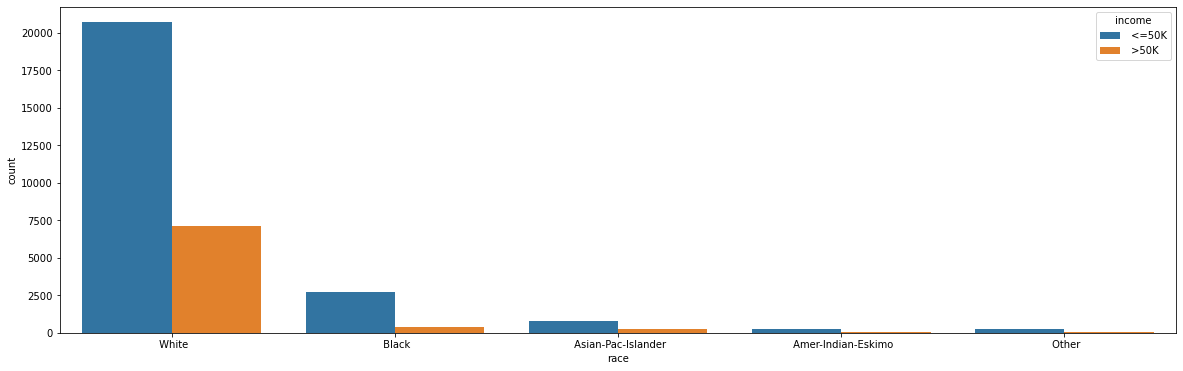

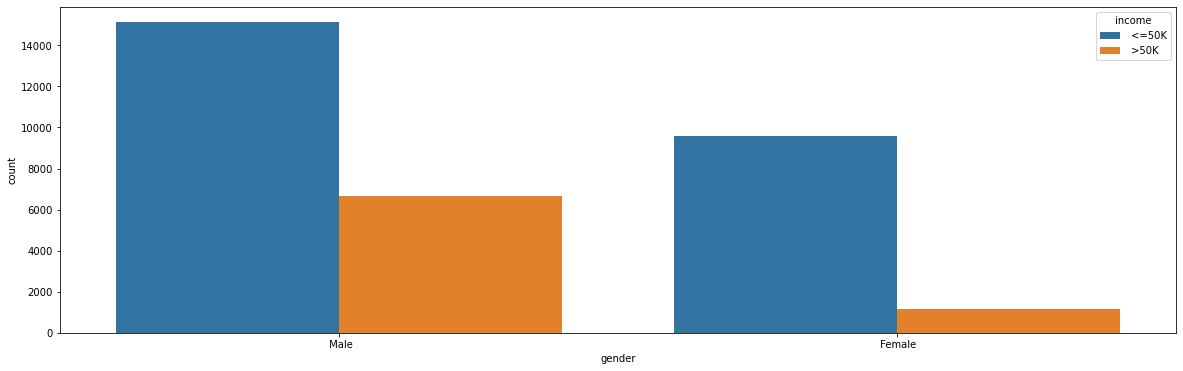

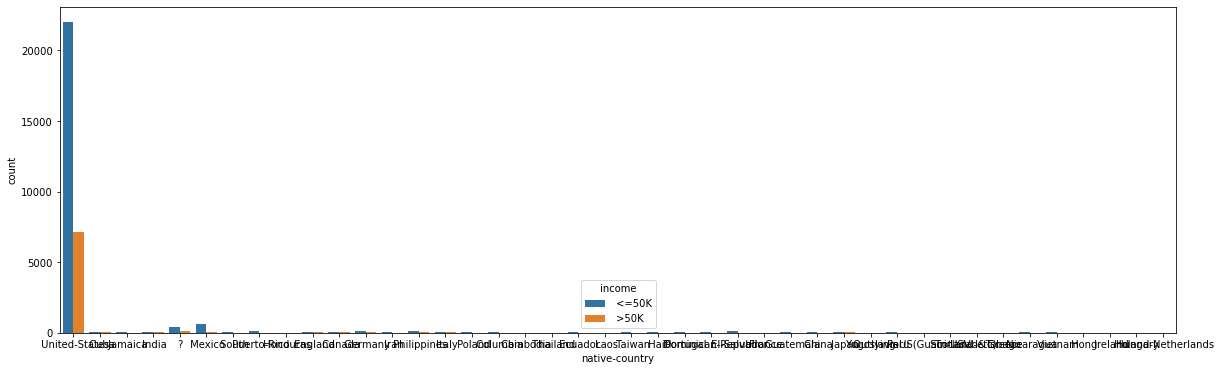

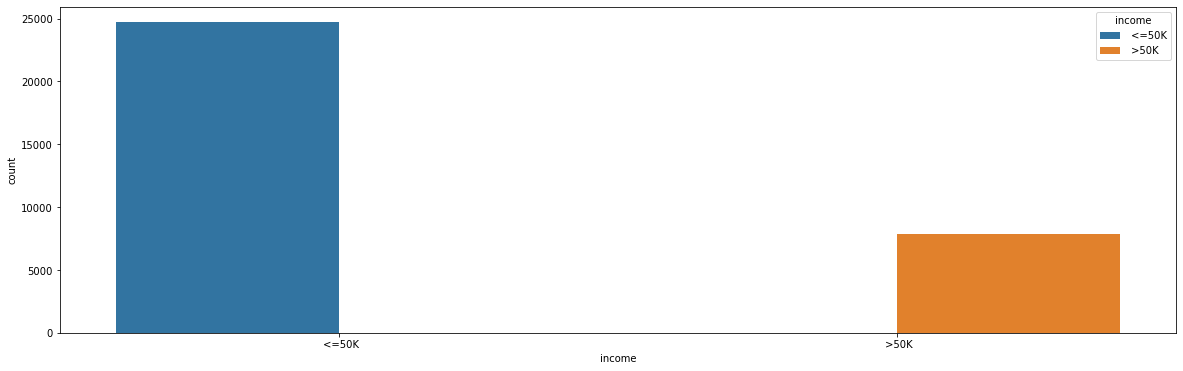

In [18]:
for col in cat_cols:
    plt.figure (figsize=(20,6))
    ax = sns.countplot(x=col, hue = 'income', data=df_adult_train)



In [19]:

col_corr = set()  
# finding correlation
corr_val = df_adult_train.corr(method='pearson')
corr_val

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.076646         0.036527      0.077674   
fnlwgt          -0.076646  1.000000        -0.043195      0.000432   
educational-num  0.036527 -0.043195         1.000000      0.122630   
capital-gain     0.077674  0.000432         0.122630      1.000000   
capital-loss     0.057775 -0.010252         0.079923     -0.031615   
hours-per-week   0.068756 -0.018768         0.148123      0.078409   

                 capital-loss  hours-per-week  
age                  0.057775        0.068756  
fnlwgt              -0.010252       -0.018768  
educational-num      0.079923        0.148123  
capital-gain        -0.031615        0.078409  
capital-loss         1.000000        0.054256  
hours-per-week       0.054256        1.000000

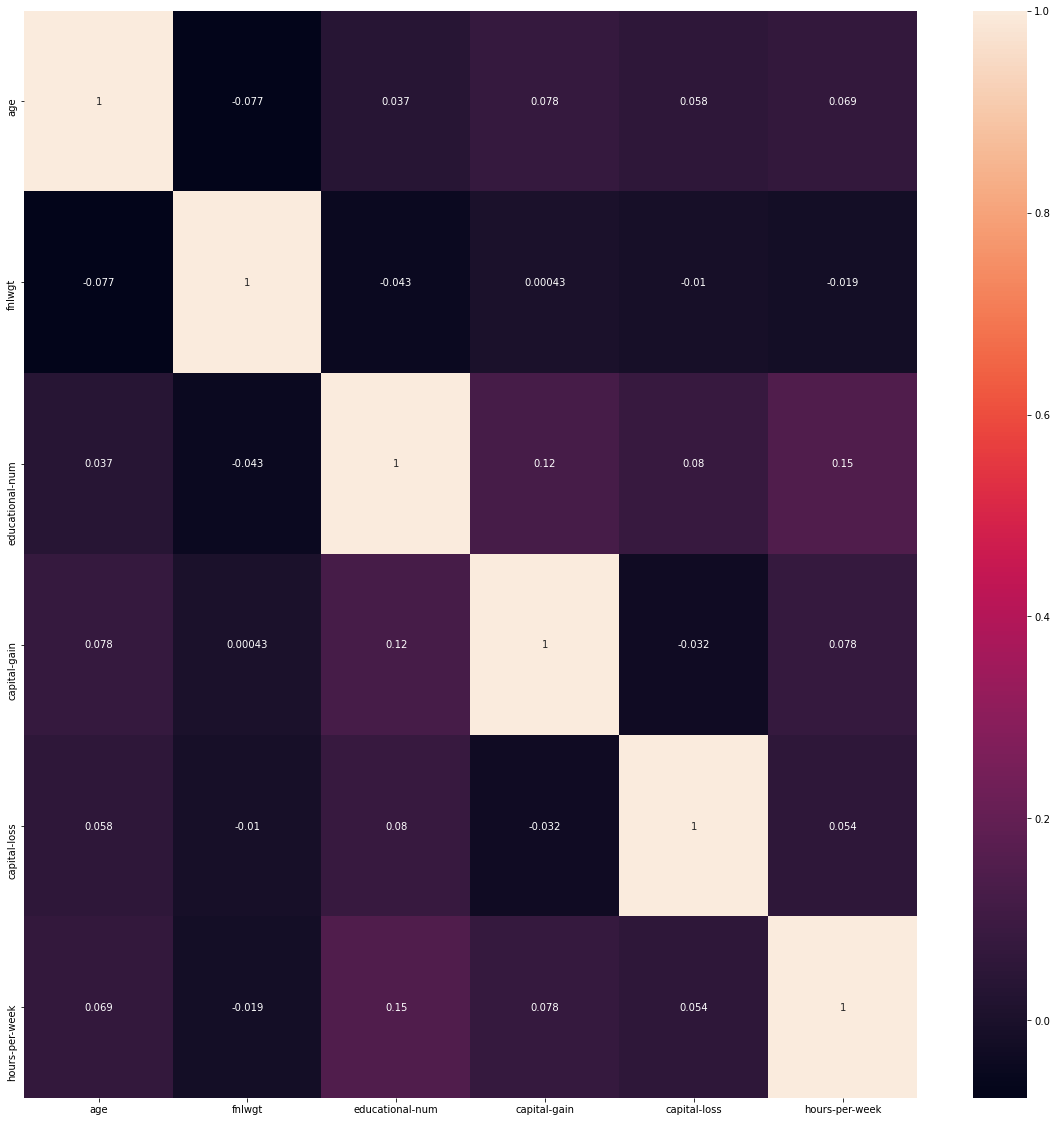

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_val,annot=True)
plt.show()

In [21]:
# label encode categorical columns
le = LabelEncoder()

for col in cat_cols:
    df_adult_train[col]= le.fit_transform(df_adult_train[col])

df_adult_train.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   39          7   77516          9               13               4   
1   50          6   83311          9               13               2   
2   38          4  215646         11                9               0   
3   53          4  234721          1                7               2   
4   28          4  338409          9               13               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           1             1     4       1          2174             0   
1           4             0     4       1             0             0   
2           6             1     4       1             0             0   
3           6             0     2       1             0             0   
4          10             5     2       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39       0  
2              40              39       0  
3              40              39       0  
4              40               5       0

In [22]:
# check VIF

vif = pd.DataFrame()
vif['columns'] = df_adult_train.columns
vif["VIF"] = [variance_inflation_factor(df_adult_train.values, i) for i in range(df_adult_train.shape[1])]
vif


columns        VIF
0               age   8.612915
1         workclass   8.492594
2            fnlwgt   4.033151
3         education   9.239470
4   educational-num  19.641550
5    marital-status   4.071643
6        occupation   3.711141
7      relationship   2.649283
8              race  17.591432
9            gender   4.462940
10     capital-gain   1.083818
11     capital-loss   1.078968
12   hours-per-week  12.202241
13   native-country  19.823951
14           income   1.740995

In [32]:
x = df_adult_train.drop(columns=['income'])
y = df_adult_train['income']

In [34]:
extra_tree = ExtraTreesClassifier().fit(x,y)
            
selector = SelectFromModel(estimator = extra_tree)
selector.fit(x,y)
selected_column_index = selector.get_support(True)
selected_features = x.iloc[:,selected_column_index]



In [101]:
# the important columns are

print("Selected Columns are : ", selected_features.columns)
x = selected_features
selected_features.head()
x.head()

Selected Columns are :  Index(['age', 'fnlwgt', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'capital-gain', 'hours-per-week'],
      dtype='object')


age  fnlwgt  educational-num  marital-status  occupation  relationship  \
0   39   77516               13               4           1             1   
1   50   83311               13               2           4             0   
2   38  215646                9               0           6             1   
3   53  234721                7               2           6             0   
4   28  338409               13               2          10             5   

   capital-gain  hours-per-week  
0          2174              40  
1             0              13  
2             0              40  
3             0              40  
4             0              40

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)


In [37]:

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=2)


In [38]:
y_train.head()

7665     0
7086     0
11712    1
17876    0
17493    1
Name: income, dtype: int32

In [40]:
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [41]:
y_pred = model.predict(x_test)

In [86]:
model.score(x_test,y_test)
xgboost_score = roc_auc_score(y_test, y_pred) 
print(xgboost_score)
model_name.append('xgboost')
model_performance.append(xgboost_score)

0.7581712655891854


In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      8331
           1       0.43      0.72      0.54      1438

    accuracy                           0.82      9769
   macro avg       0.69      0.78      0.71      9769
weighted avg       0.87      0.82      0.84      9769



In [84]:

score_xgboost = accuracy_score(y_test,y_pred)
print('The accuracy of the xgboost is', score_xgboost)

The accuracy of the xgboost is 0.8403111884532706


In [87]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

score_logreg = logreg.score(x_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)
y_pred = logreg.predict(x_test)
print(classification_report(y_pred,y_test))
logreg_auc = roc_auc_score(y_test, y_pred) 
print(logreg_auc)
model_name.append('logreg')
model_performance.append(logreg_auc)

The accuracy of the Logistic Regression is 0.8183027945542021
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      8331
           1       0.43      0.72      0.54      1438

    accuracy                           0.82      9769
   macro avg       0.69      0.78      0.71      9769
weighted avg       0.87      0.82      0.84      9769

0.6877171995415742


In [91]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

score_randomforest = randomforest.score(x_test,y_test)
print('The accuracy of RandomForestClassifier is', score_randomforest)
y_pred = randomforest.predict(x_test)
print(classification_report(y_pred,y_test))
randomforest_auc = roc_auc_score(y_test, y_pred) 
print(randomforest_auc)

model_name.append('RF')
model_performance.append(randomforest_auc)

The accuracy of RandomForestClassifier is 0.8412324700583478
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7751
           1       0.60      0.71      0.65      2018

    accuracy                           0.84      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.85      0.84      0.85      9769

0.7590619190715975


In [88]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

score_knn = knn.score(x_test,y_test)
print('The accuracy of KNeighborsClassifier  is', score_knn)

y_pred = knn.predict(x_test)
print(classification_report(y_pred,y_test))

knn_auc = roc_auc_score(y_test, y_pred) 
print(knn_auc)

model_name.append('knn')
model_performance.append(knn_auc)

The accuracy of KNeighborsClassifier  is 0.8248541304125294
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7649
           1       0.58      0.66      0.62      2120

    accuracy                           0.82      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.83      0.82      0.83      9769

0.7441433674896673


In [98]:
model_name

['xgboost', 'logreg', 'knn', 'RF']

In [99]:
model_performance

[0.7581712655891854,
 0.6877171995415742,
 0.7441433674896673,
 0.7590619190715975]

In [100]:
import pickle 
filename = 'randomforest.pickle'
pickle.dump(randomforest, open(filename, 'wb'))